#### Importing the Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error 
from math import sqrt 
sns.set()

#### Importing the Dataset

In [2]:
shoe_data = pd.read_csv("data/ShoeSales.csv")
softdrink_data = pd.read_csv("data/SoftDrink.csv")

In [3]:
shoe_data.head()

YearMonth  Shoe_Sales
0   1980-01          85
1   1980-02          89
2   1980-03         109
3   1980-04          95
4   1980-05          91

In [4]:
softdrink_data.head()

YearMonth  SoftDrinkProduction
0   1980-01                 1954
1   1980-02                 2302
2   1980-03                 3054
3   1980-04                 2414
4   1980-05                 2226

In [5]:
shoe_data.dtypes

YearMonth     object
Shoe_Sales     int64
dtype: object

In [6]:
softdrink_data.dtypes

YearMonth              object
SoftDrinkProduction     int64
dtype: object

#### Converting datatype from object to datetime

In [7]:
shoe_data['YearMonth'] = pd.to_datetime(shoe_data['YearMonth'])
softdrink_data['YearMonth'] = pd.to_datetime(softdrink_data['YearMonth'])

In [8]:
shoe_data.dtypes, softdrink_data.dtypes

(YearMonth     datetime64[ns]
 Shoe_Sales             int64
 dtype: object,
 YearMonth              datetime64[ns]
 SoftDrinkProduction             int64
 dtype: object)

#### Feature Extraction

In [9]:
shoe_data['Year'] = shoe_data.YearMonth.dt.year
shoe_data['Month'] = shoe_data.YearMonth.dt.month

In [10]:
softdrink_data['Year'] = softdrink_data.YearMonth.dt.year
softdrink_data['Month'] = softdrink_data.YearMonth.dt.month

In [11]:
shoe_data.head(), softdrink_data.head()

(   YearMonth  Shoe_Sales  Year  Month
 0 1980-01-01          85  1980      1
 1 1980-02-01          89  1980      2
 2 1980-03-01         109  1980      3
 3 1980-04-01          95  1980      4
 4 1980-05-01          91  1980      5,
    YearMonth  SoftDrinkProduction  Year  Month
 0 1980-01-01                 1954  1980      1
 1 1980-02-01                 2302  1980      2
 2 1980-03-01                 3054  1980      3
 3 1980-04-01                 2414  1980      4
 4 1980-05-01                 2226  1980      5)

In [12]:
# indexing the Datetime to get the time period on the x-axis. 
shoe_data.index = shoe_data.YearMonth 
softdrink_data.index = softdrink_data.YearMonth

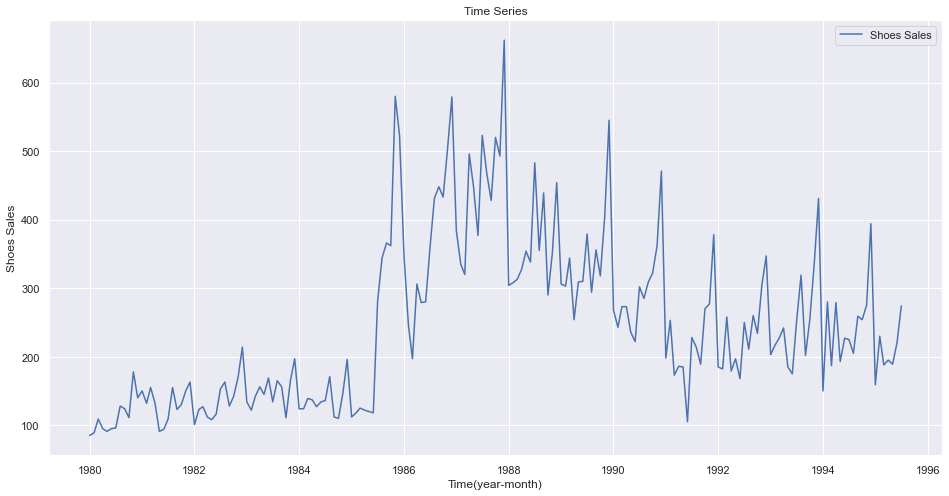

In [13]:
ts = shoe_data['Shoe_Sales'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Shoes Sales') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Shoes Sales") 
plt.legend(loc='best')

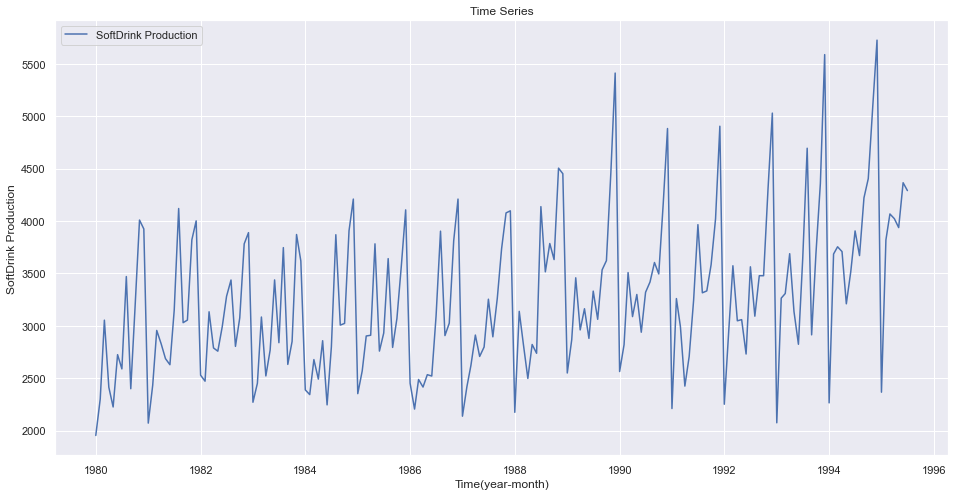

In [14]:
ts = softdrink_data['SoftDrinkProduction'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='SoftDrink Production') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("SoftDrink Production") 
plt.legend(loc='best')

## EDA

#### Year wise Shoes Sales 

<AxesSubplot:xlabel='Year'>

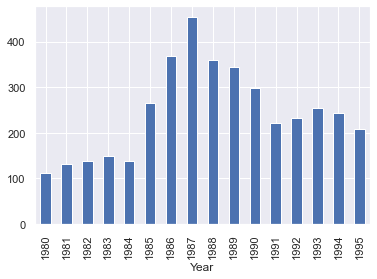

In [15]:
shoe_data.groupby('Year')['Shoe_Sales'].mean().plot.bar()

#### Year wise SoftDrink Production

<AxesSubplot:xlabel='Year'>

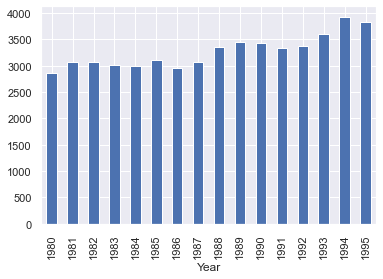

In [16]:
softdrink_data.groupby('Year')['SoftDrinkProduction'].mean().plot.bar()

#### Monthly average sales of shoes of all the years

<AxesSubplot:xlabel='Month'>

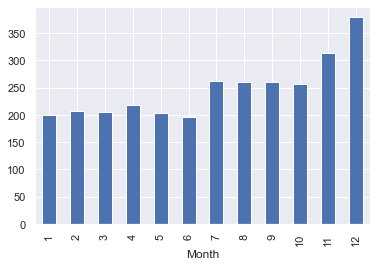

In [17]:
shoe_data.groupby('Month')['Shoe_Sales'].mean().plot.bar()

#### monthly average production of softdrink 

<AxesSubplot:xlabel='Month'>

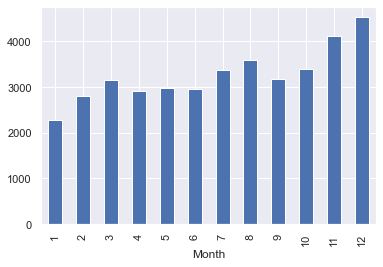

In [18]:
softdrink_data.groupby('Month')['SoftDrinkProduction'].mean().plot.bar()

#### Decompositions of the both the series 

#### Shoe Sales Data Decomposition

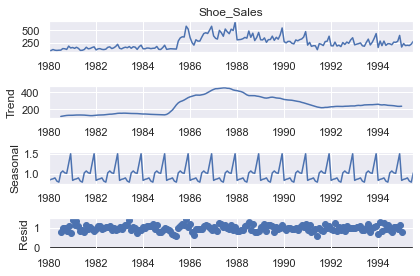

In [19]:
result = seasonal_decompose(shoe_data.Shoe_Sales, model='multiplicative')
result.plot()
plt.show()

#### SoftDrink data decomposition

<Figure size 1080x648 with 0 Axes>

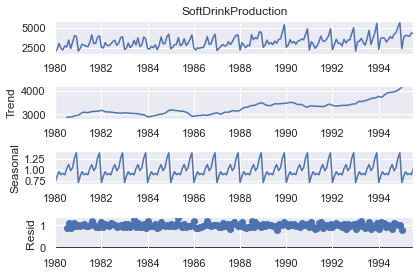

In [20]:
plt.figure(figsize = (15,9))
result = seasonal_decompose(softdrink_data.SoftDrinkProduction, model='multiplicative')
result.plot()
plt.show()

#### Looking only at the trend part of the Softdrink data

<AxesSubplot:xlabel='YearMonth'>

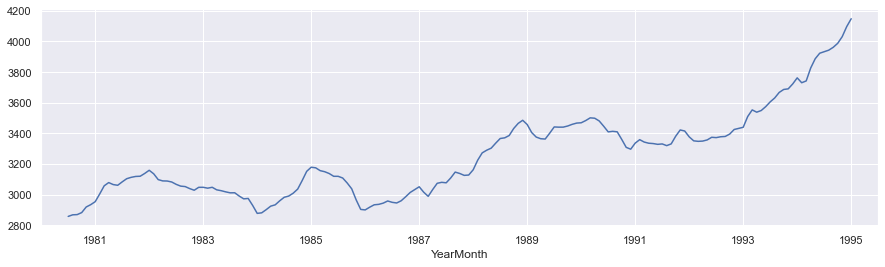

In [21]:
plt.figure(figsize = (15,4))
result.trend.plot()

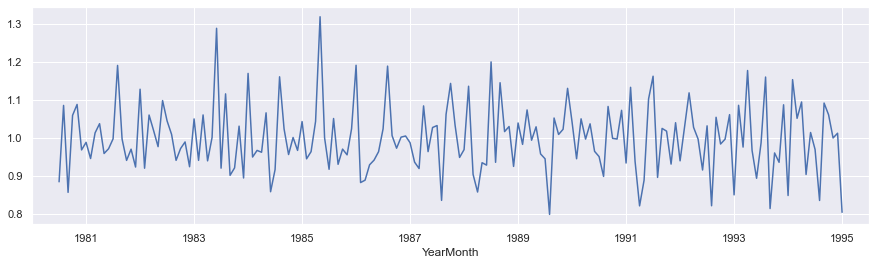

In [22]:
plt.figure(figsize = (15,4))
result.resid.plot()
plt.show()

#### Splitting the data into training and test. The test data should start in 1991

In [23]:
shoe_train_set = shoe_data[shoe_data['Year'] < 1991]['Shoe_Sales']
shoe_test_set = shoe_data[shoe_data['Year'] >= 1991]['Shoe_Sales']

softdrink_train_set = softdrink_data[softdrink_data['Year'] < 1991]['SoftDrinkProduction']
softdrink_test_set = softdrink_data[softdrink_data['Year'] >= 1991]['SoftDrinkProduction']

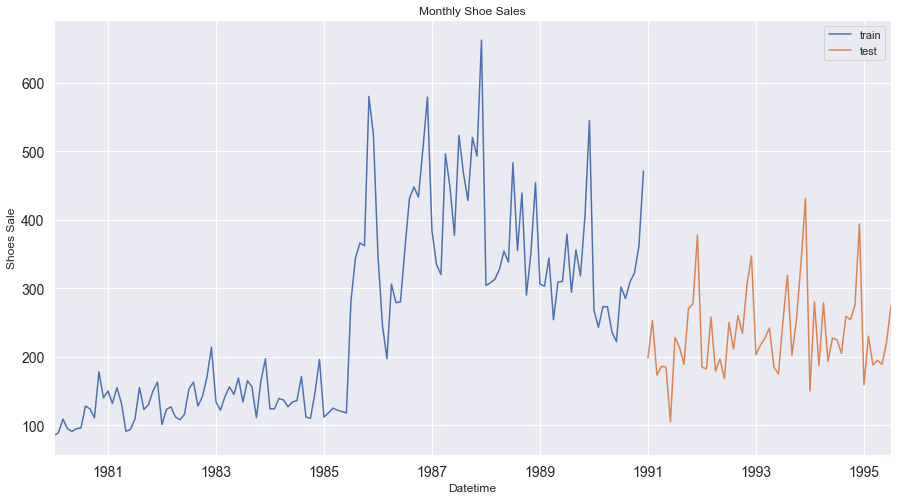

In [24]:
shoe_train_set.plot(figsize=(15,8), title= 'Monthly Shoe Sales', fontsize=14, label='train')
shoe_test_set.plot(figsize=(15,8), title= 'Monthly Shoe Sales', fontsize=14, label='test')
plt.xlabel("Datetime")
plt.ylabel("Shoes Sale")
plt.legend(loc='best')
plt.show()

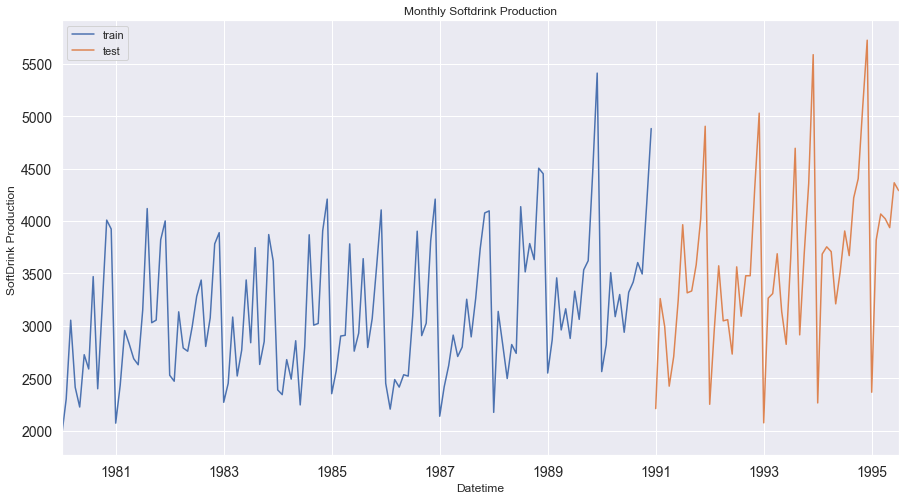

In [25]:
softdrink_train_set.plot(figsize=(15,8), title= 'Monthly Softdrink Production', fontsize=14, label='train')
softdrink_test_set.plot(figsize=(15,8), title= 'Monthly Softdrink Production', fontsize=14, label='test')
plt.xlabel("Datetime")
plt.ylabel("SoftDrink Production ")
plt.legend(loc='best')
plt.show()

#### Building Various Exponential Smoothing models on the training data

In [26]:
shoe_rmse = {}
softdrink_rmse = {}

#### Naive Forcasting Model

##### Shoe Sales

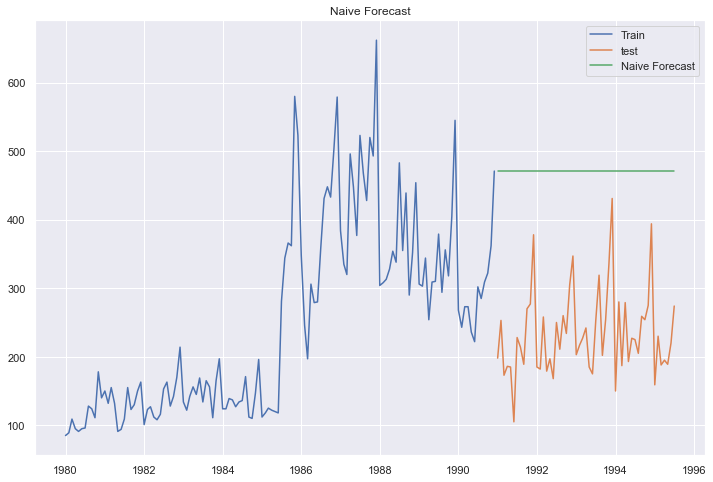

In [27]:
dd= np.asarray(shoe_train_set) 
shoe_y_hat = pd.DataFrame(shoe_test_set)
shoe_y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(shoe_train_set.index, shoe_train_set, label='Train') 
plt.plot(shoe_test_set.index,shoe_test_set, label='test') 
plt.plot(shoe_y_hat.index,shoe_y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [28]:
rms = sqrt(mean_squared_error(shoe_test_set, shoe_y_hat.naive)) 
shoe_rmse['Naive Model'] = rms
print(rms)

245.1213057762514


##### SoftDrink Sales

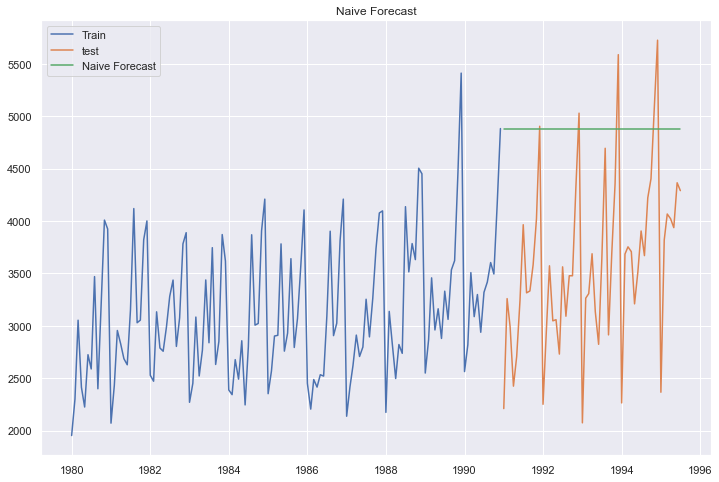

In [29]:
dd= np.asarray(softdrink_train_set) 
softdrink_y_hat = pd.DataFrame(softdrink_test_set)
softdrink_y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(softdrink_train_set.index, softdrink_train_set, label='Train') 
plt.plot(softdrink_test_set.index,softdrink_test_set, label='test') 
plt.plot(softdrink_y_hat.index,softdrink_y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [30]:
rms = sqrt(mean_squared_error(softdrink_test_set, softdrink_y_hat.naive)) 
softdrink_rmse['Naive Model'] = rms
print(rms)

1519.2592333705984


#### Moving Average Model 

##### Shoe Sale

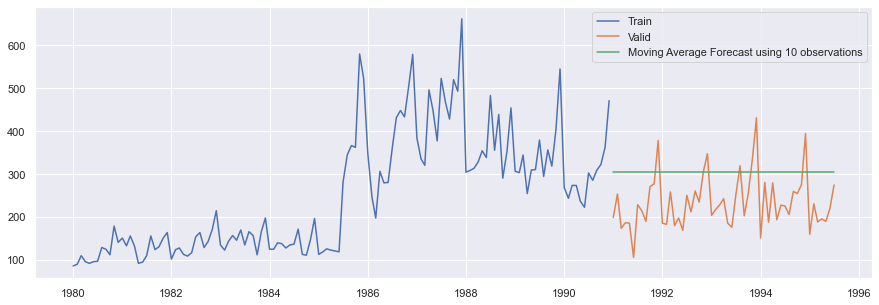

In [31]:
shoe_y_hat['moving_avg_forecast'] = shoe_train_set.rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(shoe_train_set, label='Train') 
plt.plot(shoe_test_set, label='Valid') 
plt.plot(shoe_y_hat['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 

In [32]:
rms = sqrt(mean_squared_error(shoe_test_set, shoe_y_hat.moving_avg_forecast)) 
shoe_rmse['Moving Average'] = rms
print(rms)

94.63343153260567


##### Softdrink Data

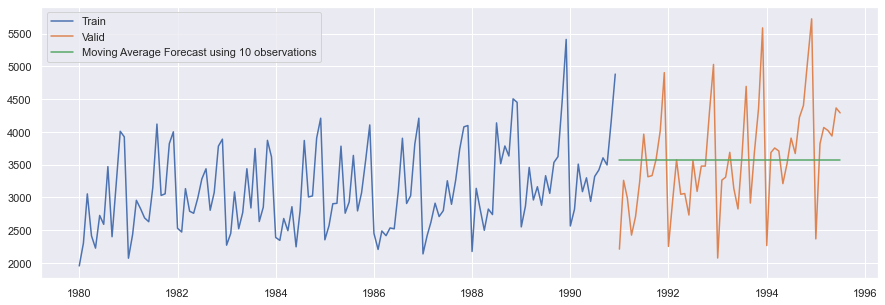

In [33]:
softdrink_y_hat['moving_avg_forecast'] = softdrink_train_set.rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(softdrink_train_set, label='Train') 
plt.plot(softdrink_test_set, label='Valid') 
plt.plot(softdrink_y_hat['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 

In [34]:
rms = sqrt(mean_squared_error(softdrink_test_set, softdrink_y_hat.moving_avg_forecast)) 
softdrink_rmse['Moving Average'] = rms
print(rms)

807.4612200088507


#### Simple Exponential Smoothing

##### Shoe Sales

In [35]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 

C:\Users\rishabhsaxena01\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


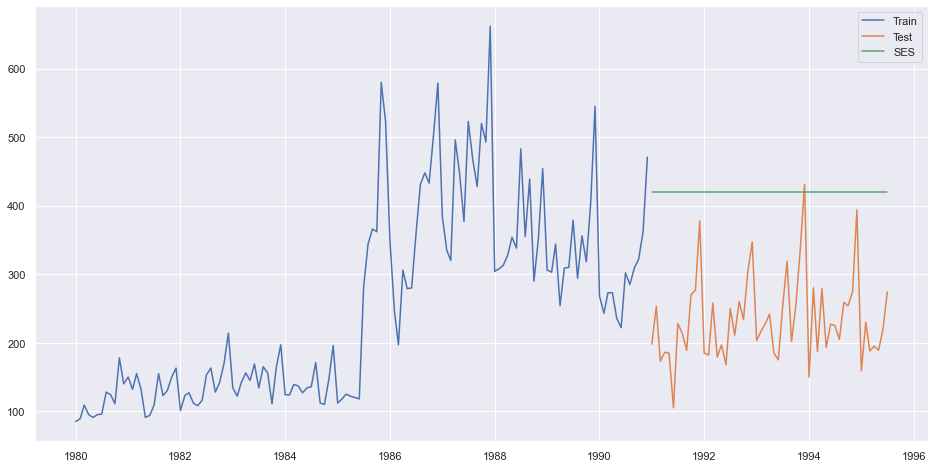

In [36]:
fit2 = SimpleExpSmoothing(np.asarray(shoe_train_set)).fit(smoothing_level=0.6,optimized=False)
shoe_y_hat['SES'] = fit2.forecast(len(shoe_test_set)) 
plt.figure(figsize=(16,8)) 
plt.plot(shoe_train_set, label='Train') 
plt.plot(shoe_test_set, label='Test') 
plt.plot(shoe_y_hat['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

In [37]:
rms = sqrt(mean_squared_error(shoe_test_set, shoe_y_hat.SES)) 
shoe_rmse['SES'] = rms
print(rms)

195.6633274569922


##### Softdrink data

C:\Users\rishabhsaxena01\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


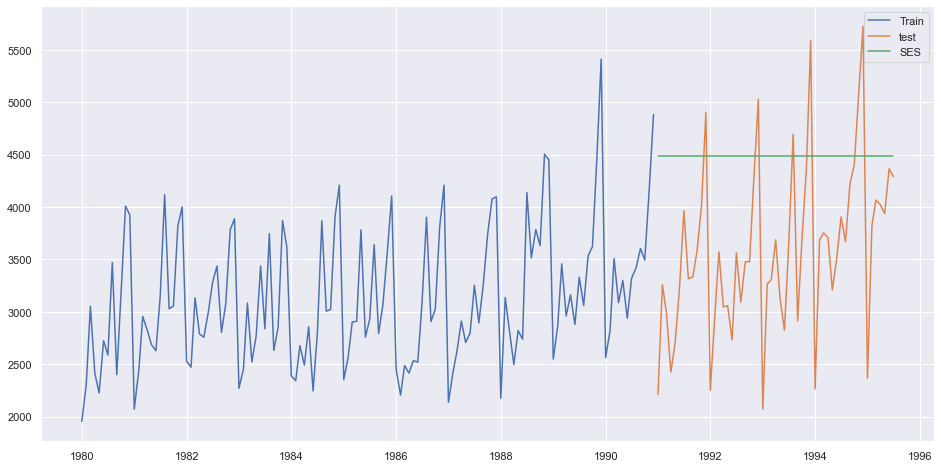

In [38]:
fit2 = SimpleExpSmoothing(np.asarray(softdrink_train_set)).fit(smoothing_level=0.6,optimized=False)
softdrink_y_hat['SES'] = fit2.forecast(len(softdrink_test_set)) 
plt.figure(figsize=(16,8)) 
plt.plot(softdrink_train_set, label='Train') 
plt.plot(softdrink_test_set, label='test') 
plt.plot(softdrink_y_hat['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

In [39]:
rms = sqrt(mean_squared_error(softdrink_test_set, softdrink_y_hat.SES)) 
softdrink_rmse['SES'] = rms
print(rms)

1203.5659559337632


#### Holt’s Linear Trend Model

##### Shoe Data

C:\Users\rishabhsaxena01\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-40-cfd49c1f4e91>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(shoe_train_set)).fit(smoothing_level = 0.05,smoothing_slope = 0.05)


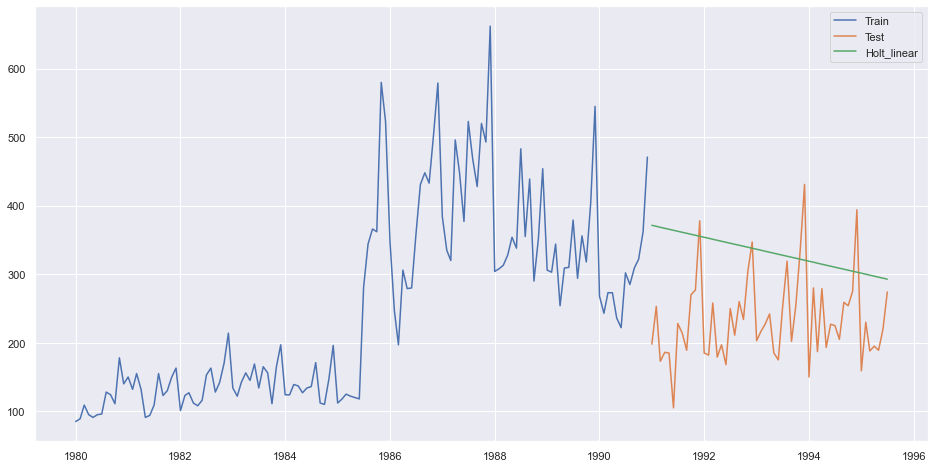

In [40]:
fit1 = Holt(np.asarray(shoe_train_set)).fit(smoothing_level = 0.05,smoothing_slope = 0.05) 
shoe_y_hat['Holt_linear'] = fit1.forecast(len(shoe_test_set)) 
plt.figure(figsize=(16,8)) 
plt.plot(shoe_train_set, label='Train') 
plt.plot(shoe_test_set, label='Test') 
plt.plot(shoe_y_hat['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [41]:
rms = sqrt(mean_squared_error(shoe_test_set, shoe_y_hat.Holt_linear)) 
shoe_rmse['Holt_Linear'] = rms
print(rms)

120.26076824710431


##### Softdrink Data`

C:\Users\rishabhsaxena01\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-42-8438980541e4>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(softdrink_train_set)).fit(smoothing_level = 0.05,smoothing_slope = 0.05)


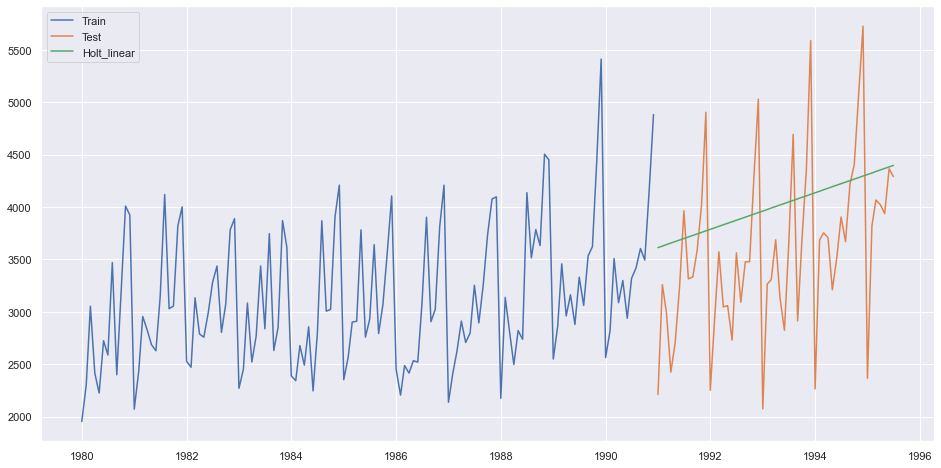

In [42]:
fit1 = Holt(np.asarray(softdrink_train_set)).fit(smoothing_level = 0.05,smoothing_slope = 0.05) 
softdrink_y_hat['Holt_linear'] = fit1.forecast(len(softdrink_test_set)) 
plt.figure(figsize=(16,8)) 
plt.plot(softdrink_train_set, label='Train') 
plt.plot(softdrink_test_set, label='Test') 
plt.plot(softdrink_y_hat['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [43]:
rms = sqrt(mean_squared_error(softdrink_test_set, softdrink_y_hat.Holt_linear)) 
softdrink_rmse['Holt_Linear'] = rms
print(rms)

844.8400570056797


#### Checking The Stationarity of the time series

In [44]:
from statsmodels.tsa.stattools import adfuller 

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() # 12 months for each year
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    

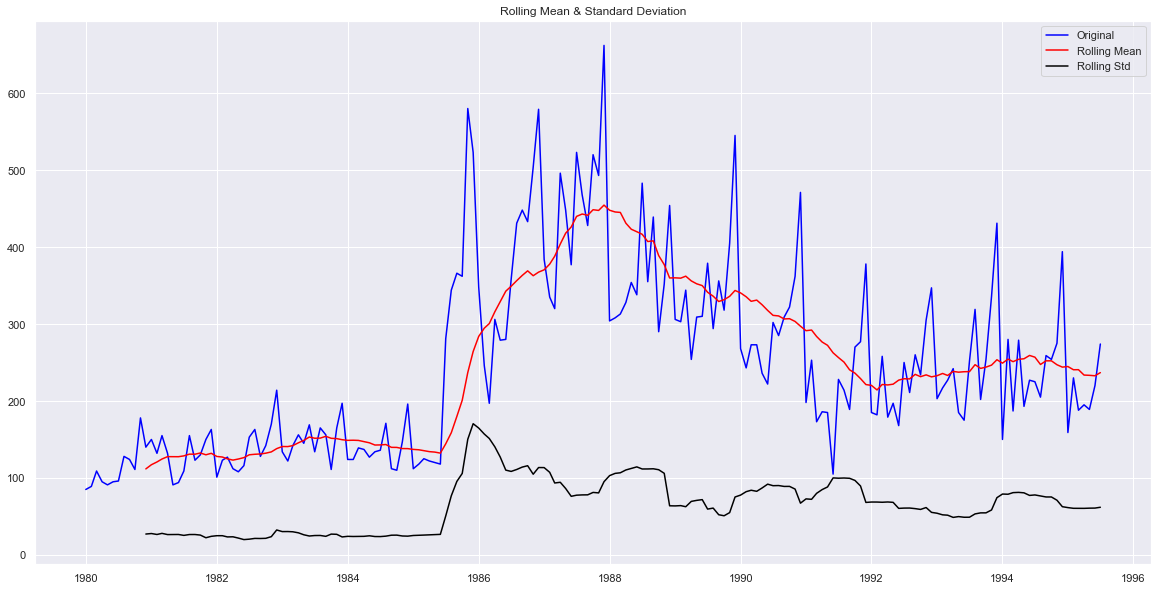

Results of Dickey-Fuller Test:
Test Statistic                  -1.717397
p-value                          0.422172
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64


In [45]:
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10
test_stationarity(shoe_data.Shoe_Sales)

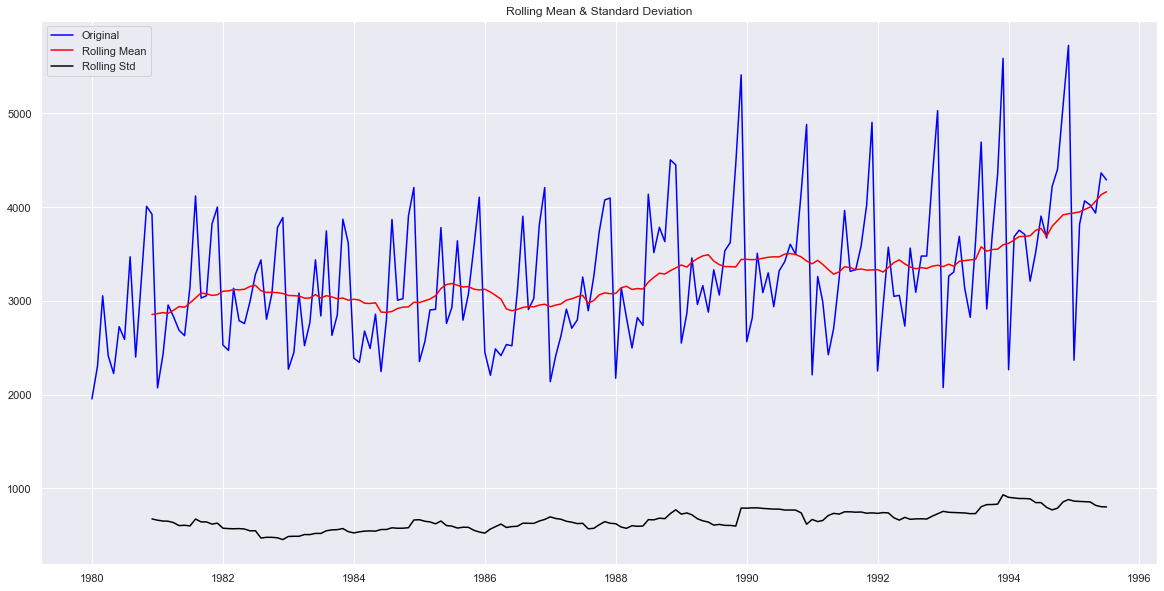

Results of Dickey-Fuller Test:
Test Statistic                   1.098734
p-value                          0.995206
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64


In [47]:
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10
test_stationarity(softdrink_data.SoftDrinkProduction)

##### We can clearly see that both of the time series are non stationary So,  we need to convert them to stationanry

##### Shoe Data Treatment

##### Removing Trend

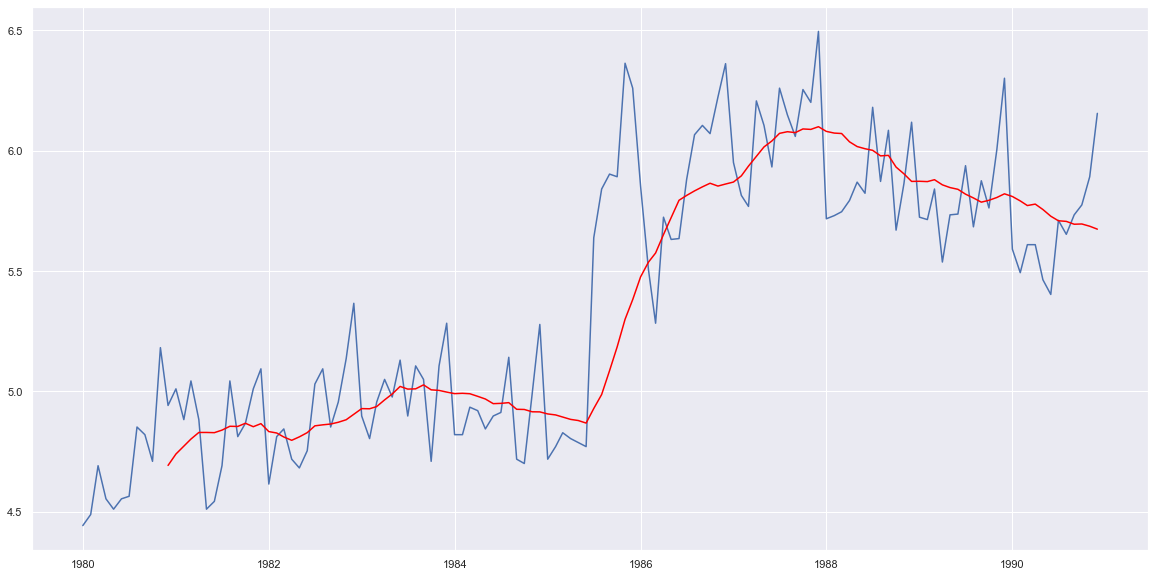

In [58]:
shoe_Train_log = np.log(shoe_train_set) 
shoe_test_log = np.log(shoe_test_set)
shoe_moving_avg = shoe_Train_log.rolling(12).mean()
plt.plot(shoe_Train_log) 
plt.plot(shoe_moving_avg, color = 'red') 
plt.show()

In [59]:
shoe_train_log_moving_avg_diff = shoe_Train_log - shoe_moving_avg

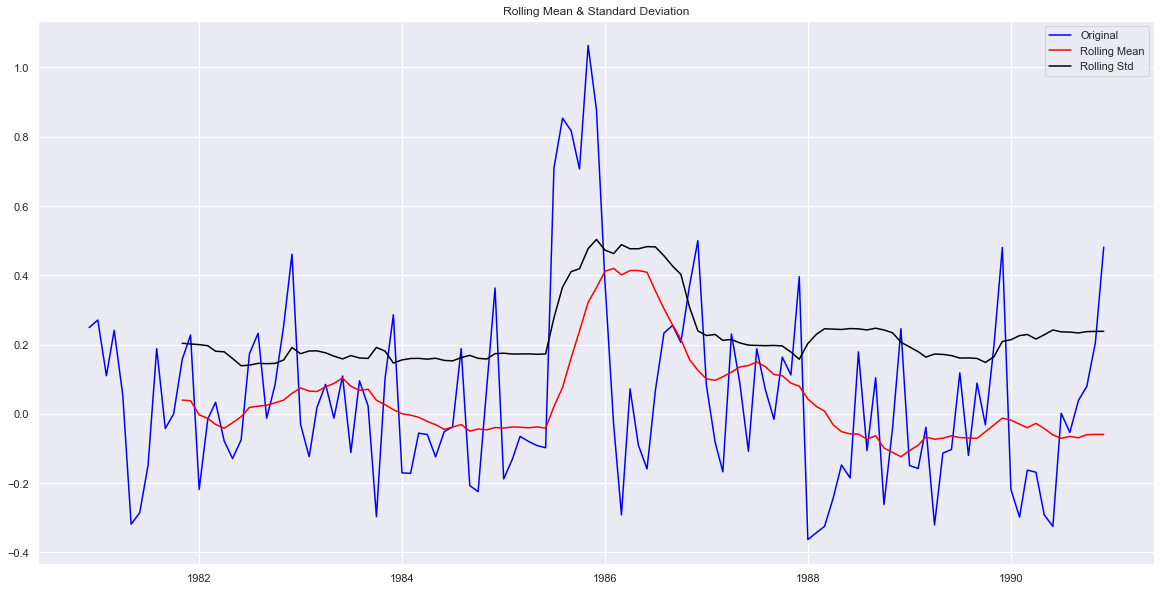

Results of Dickey-Fuller Test:
Test Statistic                  -2.725842
p-value                          0.069672
#Lags Used                      13.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


In [68]:
shoe_train_log_moving_avg_diff.dropna(inplace = True) 
test_stationarity(shoe_train_log_moving_avg_diff)

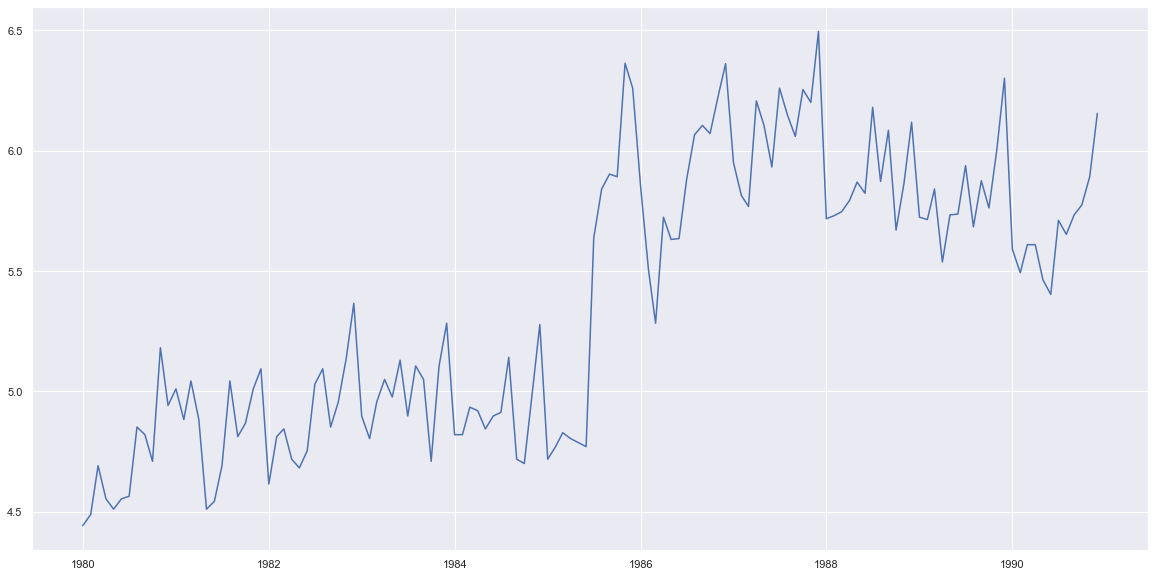

In [69]:
shoe_Train_log_diff = shoe_Train_log - shoe_Train_log.shift(1)
plt.plot(shoe_Train_log)

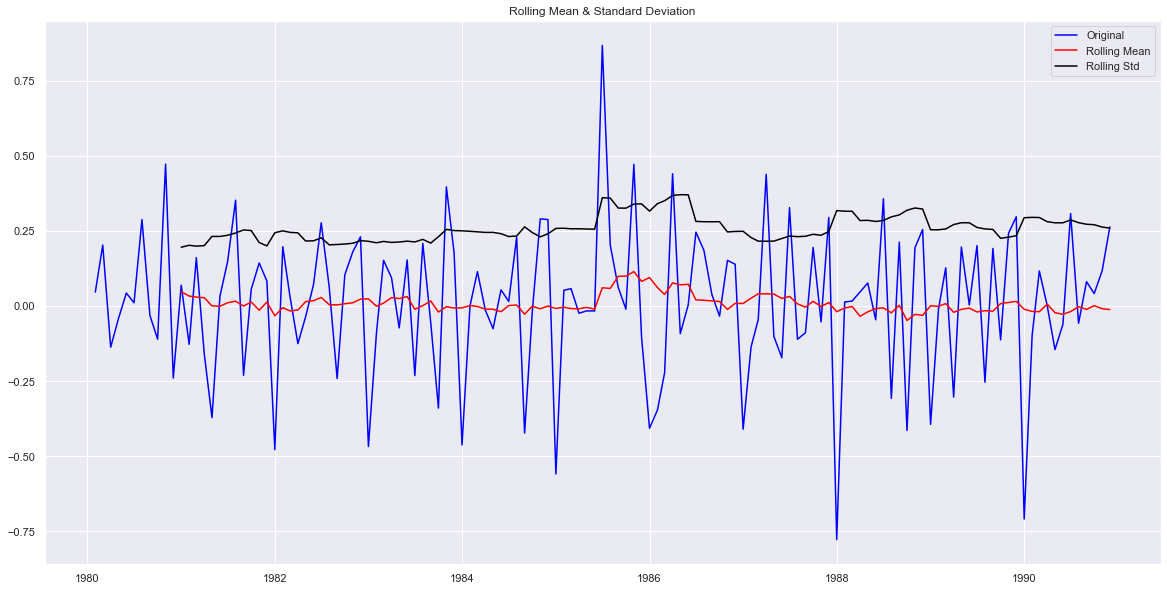

Results of Dickey-Fuller Test:
Test Statistic                  -3.057864
p-value                          0.029833
#Lags Used                      13.000000
Number of Observations Used    117.000000
Critical Value (1%)             -3.487517
Critical Value (5%)             -2.886578
Critical Value (10%)            -2.580124
dtype: float64


In [70]:
shoe_Train_log_diff.dropna(inplace=True)
test_stationarity(shoe_Train_log_diff)

##### Removing Seasonality

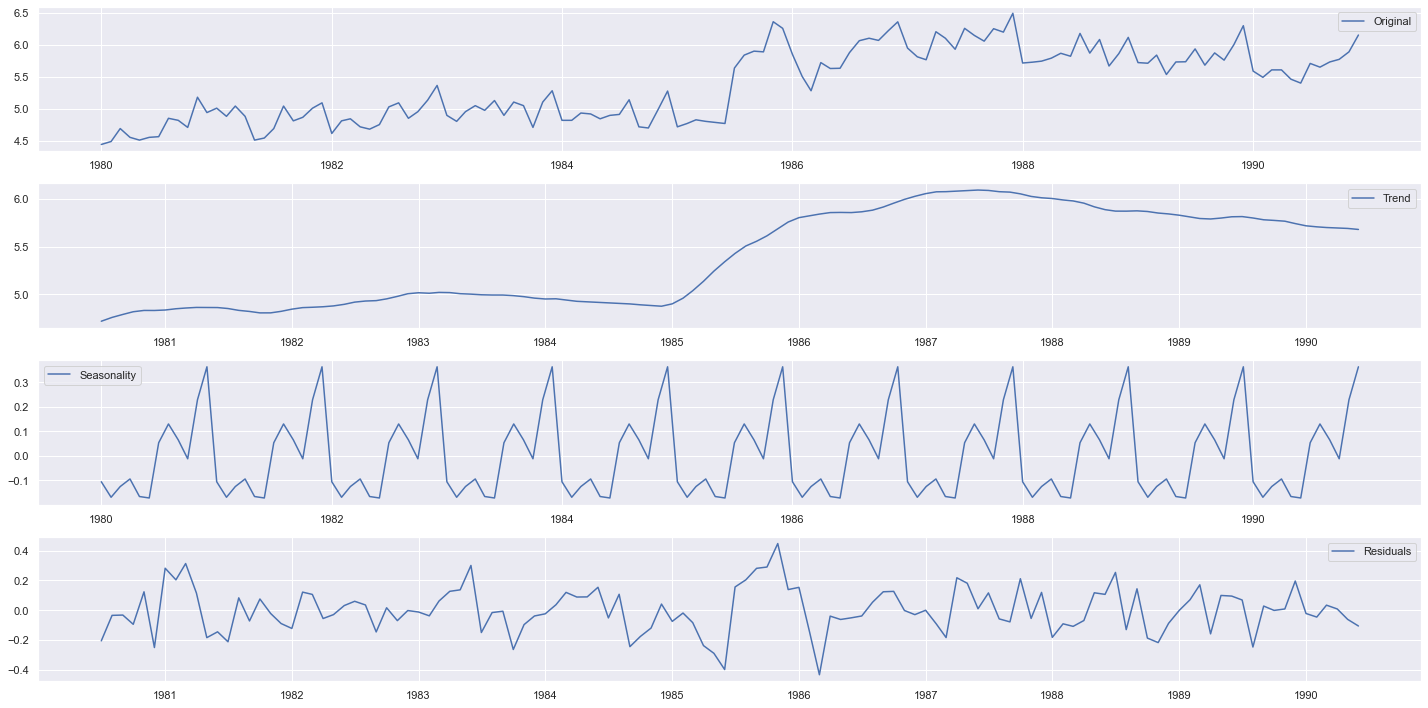

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition = seasonal_decompose(shoe_Train_log)

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

plt.subplot(411) 
plt.plot(shoe_Train_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()


###### We can see the trend, residuals and the seasonality clearly in the above graph. Seasonality shows a constant trend in counter.

##### Let’s check stationarity of residuals.

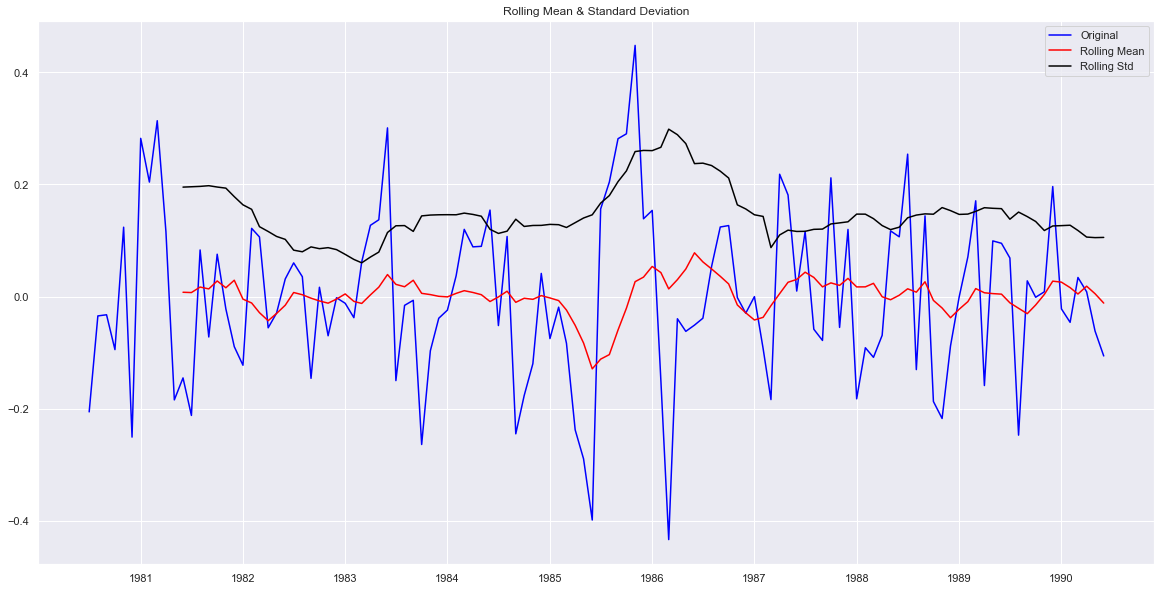

Results of Dickey-Fuller Test:
Test Statistic                -6.457813e+00
p-value                        1.468475e-08
#Lags Used                     4.000000e+00
Number of Observations Used    1.150000e+02
Critical Value (1%)           -3.488535e+00
Critical Value (5%)           -2.887020e+00
Critical Value (10%)          -2.580360e+00
dtype: float64


In [72]:
shoe_train_log_decompose = residual
shoe_train_log_decompose.dropna(inplace=True) 
test_stationarity(shoe_train_log_decompose)

## SoftDrink Treatment 

##### Removing Trend

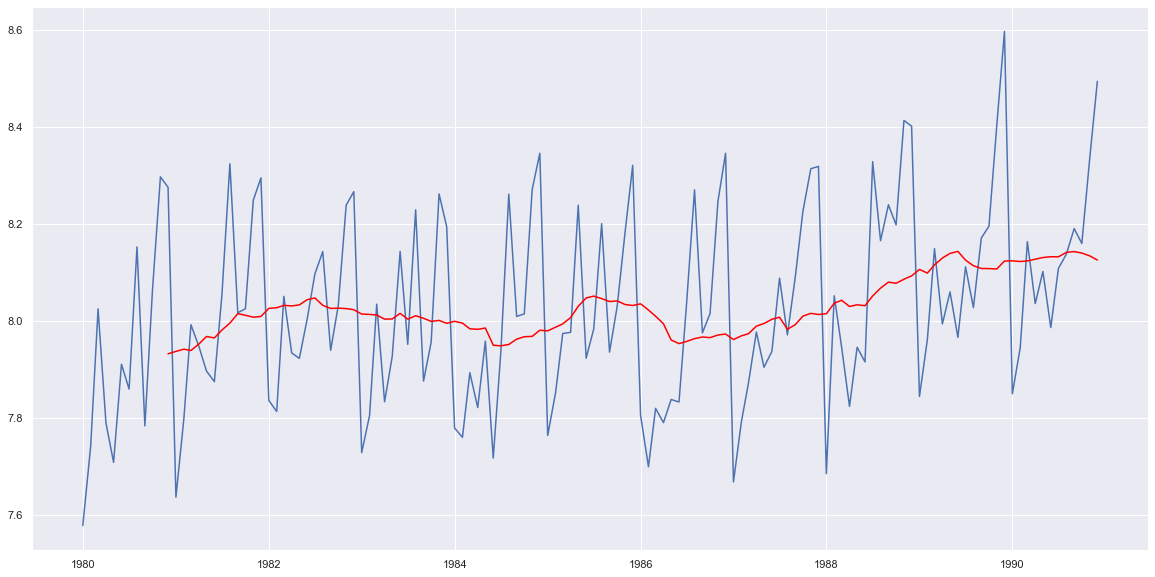

In [73]:
softdrink_Train_log = np.log(softdrink_train_set) 
softdrink_test_log = np.log(softdrink_test_set)
softdrink_moving_avg = softdrink_Train_log.rolling(12).mean()
plt.plot(softdrink_Train_log) 
plt.plot(softdrink_moving_avg, color = 'red') 
plt.show()

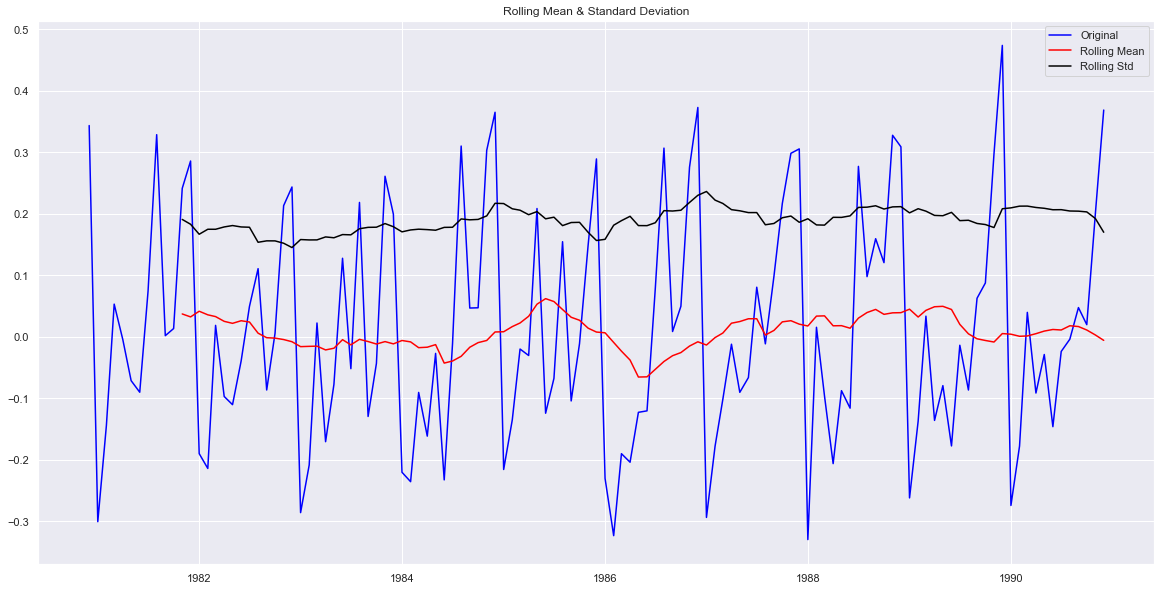

Results of Dickey-Fuller Test:
Test Statistic                  -2.817727
p-value                          0.055786
#Lags Used                      12.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64


In [74]:
softdrink_train_log_moving_avg_diff = softdrink_Train_log - softdrink_moving_avg
softdrink_train_log_moving_avg_diff.dropna(inplace = True) 
test_stationarity(softdrink_train_log_moving_avg_diff)

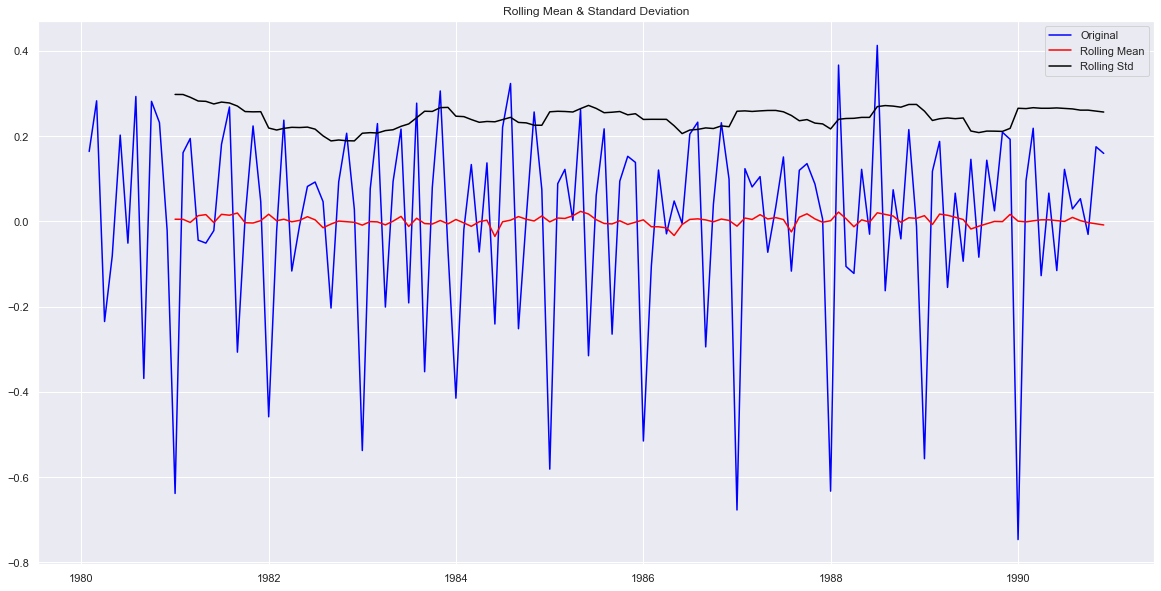

Results of Dickey-Fuller Test:
Test Statistic                -7.097663e+00
p-value                        4.247748e-10
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64


In [76]:
softdrink_train_log_diff = softdrink_Train_log - softdrink_Train_log.shift(1)
softdrink_train_log_diff.dropna(inplace = True)
test_stationarity(softdrink_train_log_diff)

#### Removing the Seasonality

<ipython-input-77-4433309a8467>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(pd.DataFrame(softdrink_train_set).SoftDrinkProduction.values, freq = 24)


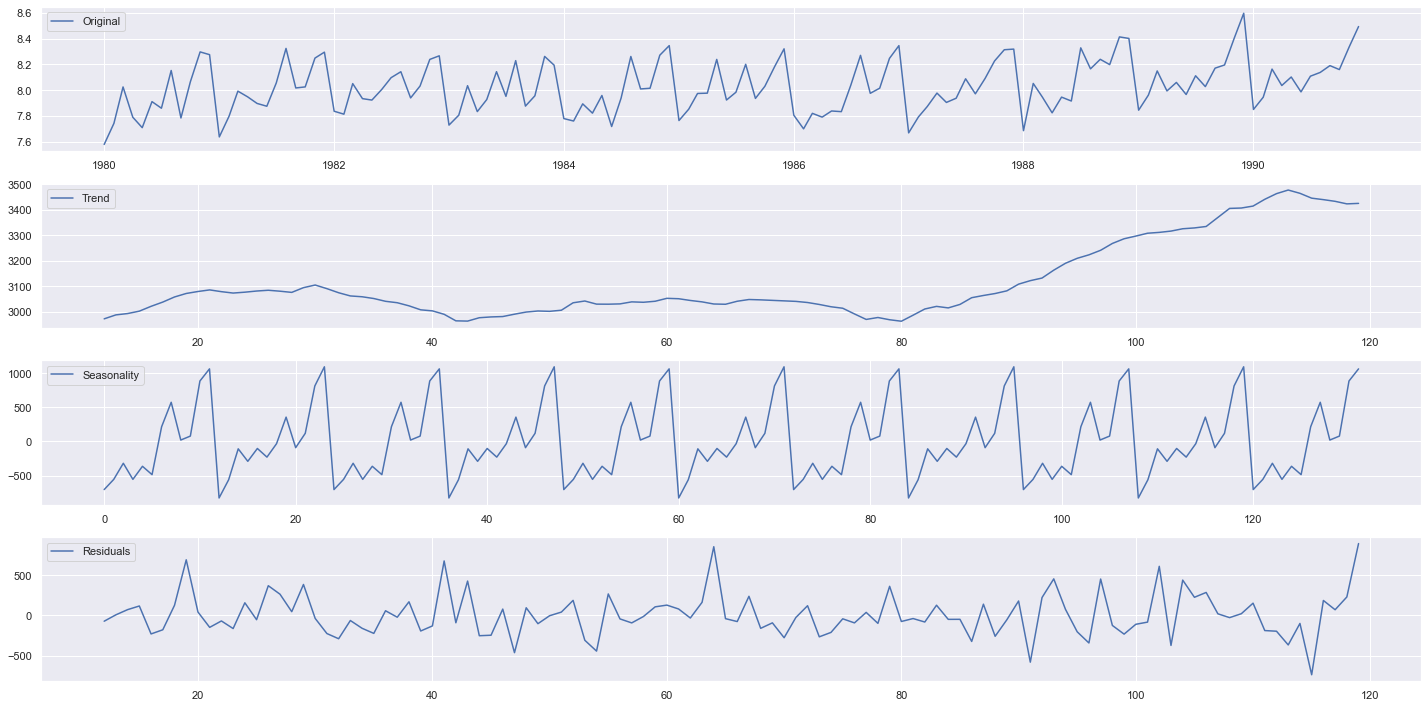

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition = seasonal_decompose(pd.DataFrame(softdrink_train_set).SoftDrinkProduction.values, freq = 24) 

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

plt.subplot(411) 
plt.plot(softdrink_Train_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()


#### We can see it is having same type of seasonality

#### Residuals Checking

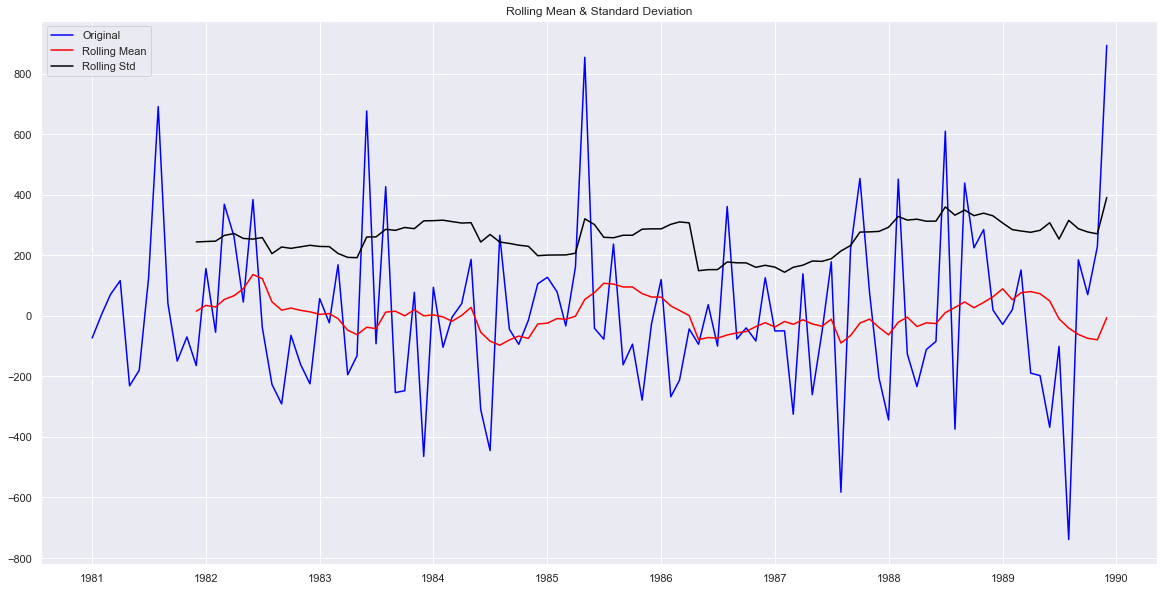

Results of Dickey-Fuller Test:
Test Statistic                  -5.514173
p-value                          0.000002
#Lags Used                       5.000000
Number of Observations Used    102.000000
Critical Value (1%)             -3.496149
Critical Value (5%)             -2.890321
Critical Value (10%)            -2.582122
dtype: float64


In [78]:
softdrink_train_log_decompose = pd.DataFrame(residual) 
softdrink_train_log_decompose['date'] = softdrink_Train_log.index 
softdrink_train_log_decompose.set_index('date', inplace = True) 
softdrink_train_log_decompose.dropna(inplace=True) 
test_stationarity(softdrink_train_log_decompose[0])

#### Now both of the Series are Stationary

#### Lets apply auto Arima model to both of the dataset

##### Shoe Sale dataset

In [59]:
#building the model
from pyramid.arima import auto_arima

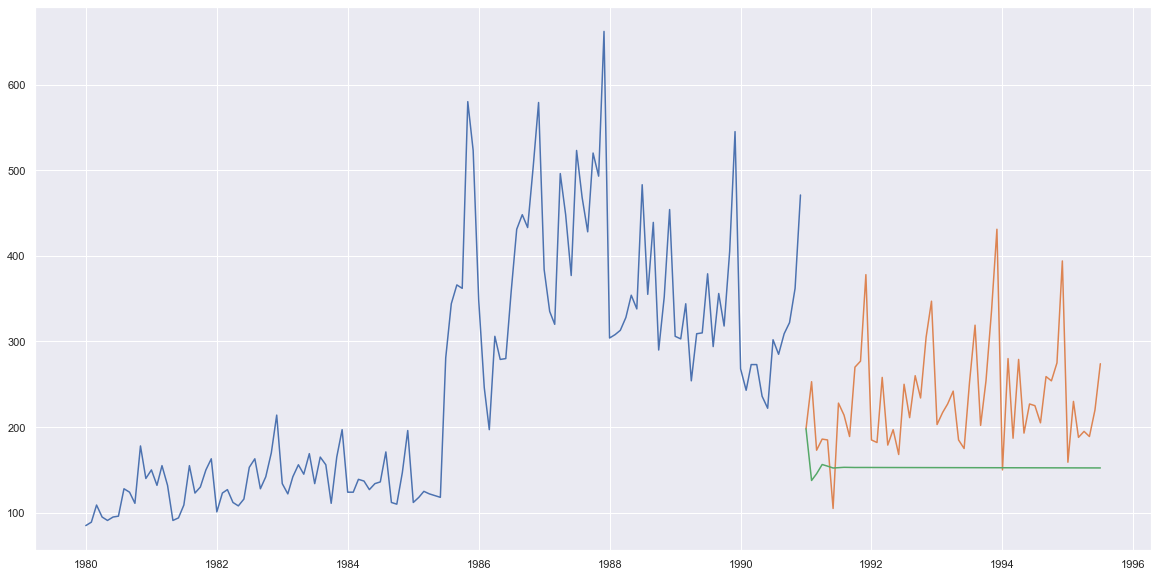

In [203]:
model = auto_arima(shoe_train_set, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(shoe_train_set)

forecast = model.predict(n_periods=len(shoe_test_set))
forecast = pd.DataFrame(forecast,index = shoe_test_set.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(shoe_train_set, label='Train')
plt.plot(shoe_test_set, label='Test')
plt.plot(forecast, label='Prediction')
plt.show()

In [205]:
#calculate rmse
rms = sqrt(mean_squared_error(shoe_test_set, forecast))
shoe_rmse['Auto Arima'] = rms
print(rms)

102.08447967725142


#### Softdrink Data

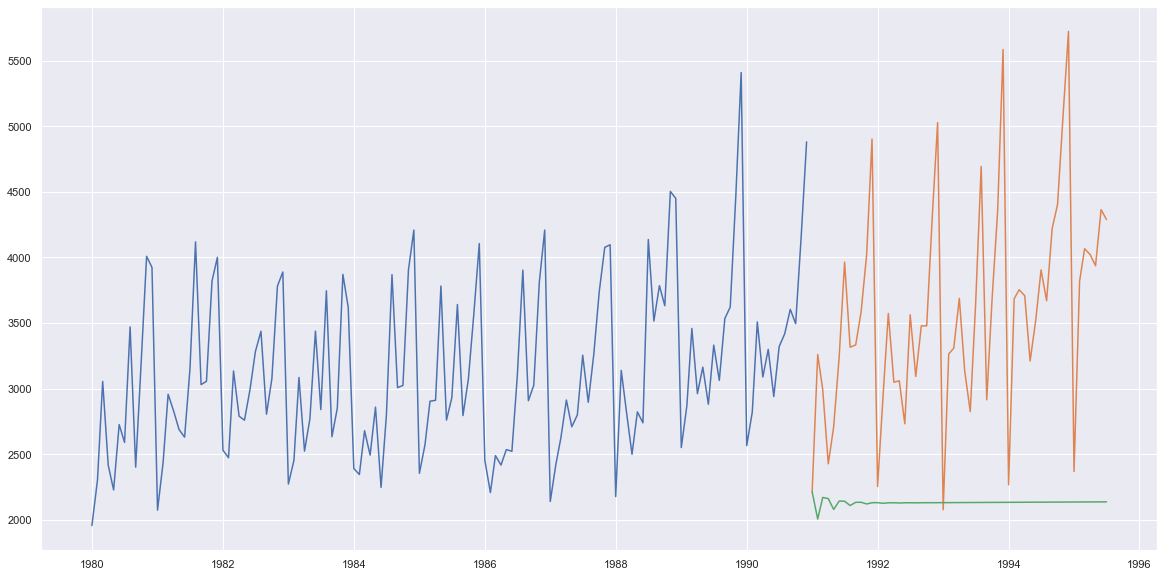

In [140]:
model = auto_arima(softdrink_train_set, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(softdrink_train_set)

forecast = model.predict(n_periods=len(softdrink_test_set))
forecast = pd.DataFrame(forecast,index = softdrink_test_set.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(softdrink_train_set, label='Train')
plt.plot(softdrink_test_set, label='Test')
plt.plot(forecast, label='Prediction')
plt.show()

In [134]:
#calculate rmse
rms = sqrt(mean_squared_error(softdrink_test_set, forecast))
softdrink_rmse['Auto Arima'] = rms
print(rms)

1673.1354850546547


##### softdrink Data

In [79]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [80]:
lag_acf = acf(softdrink_train_log_decompose, nlags=20)
lag_pacf = pacf(softdrink_train_log_decompose, nlags=20, method='ols')

C:\Users\rishabhsaxena01\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\stattools.py:665: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Autocorrelation Function')

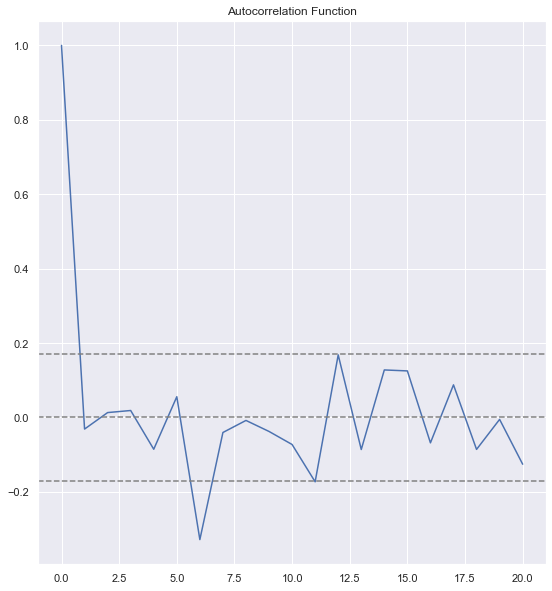

In [81]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(softdrink_train_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(softdrink_train_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

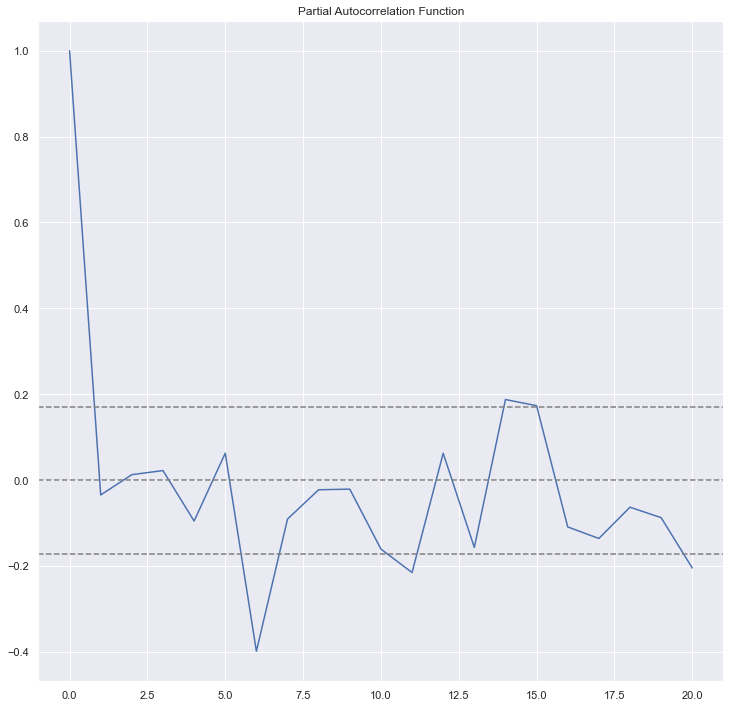

In [82]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(softdrink_train_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(softdrink_train_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [83]:
#p = 1, q = 0, d=1

In [84]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\rishabhsaxena01\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\rishabhsaxena01\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

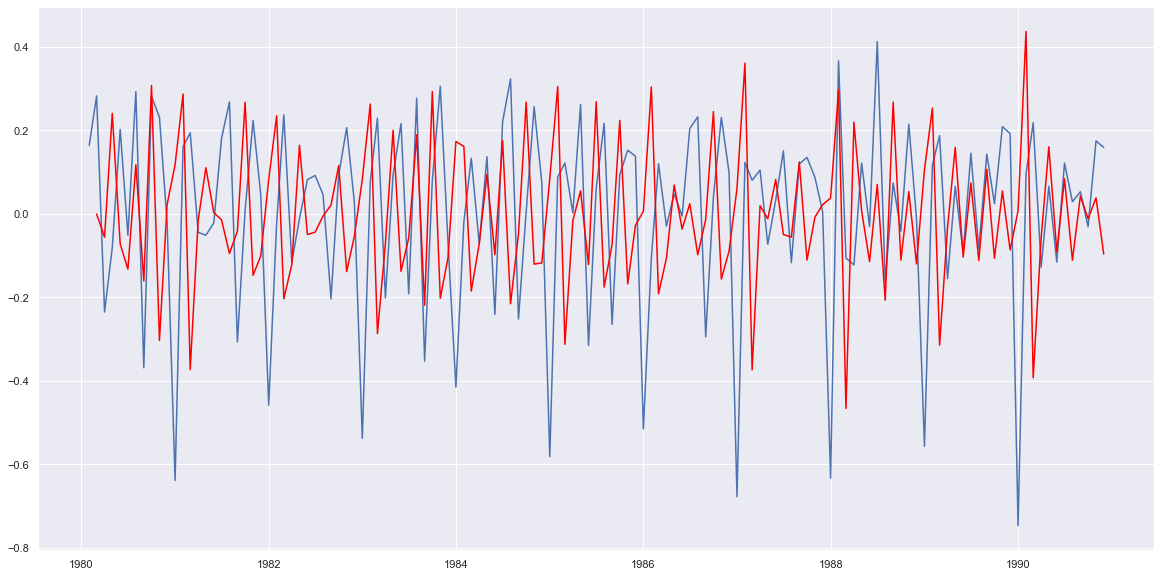

In [206]:
softdrink_train_log_diff.dropna(inplace=True)
model = ARIMA(softdrink_train_log_diff, order=(1, 1, 0))  
results_ARIMA = model.fit(disp=-1)  

plt.plot(softdrink_train_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [207]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set)[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
#     plt.plot(given_set, label = "Given set")
#     plt.plot(predict, color = 'red', label = "Predict")
#     plt.legend(loc= 'best')
#     plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set))/given_set.shape[0]))
    
#     plt.show()
    return predict
    
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
 
    plt.plot(given_set, label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set))/given_set.shape[0]))
    plt.show()
    

##### Let’s predict the values for validation set.

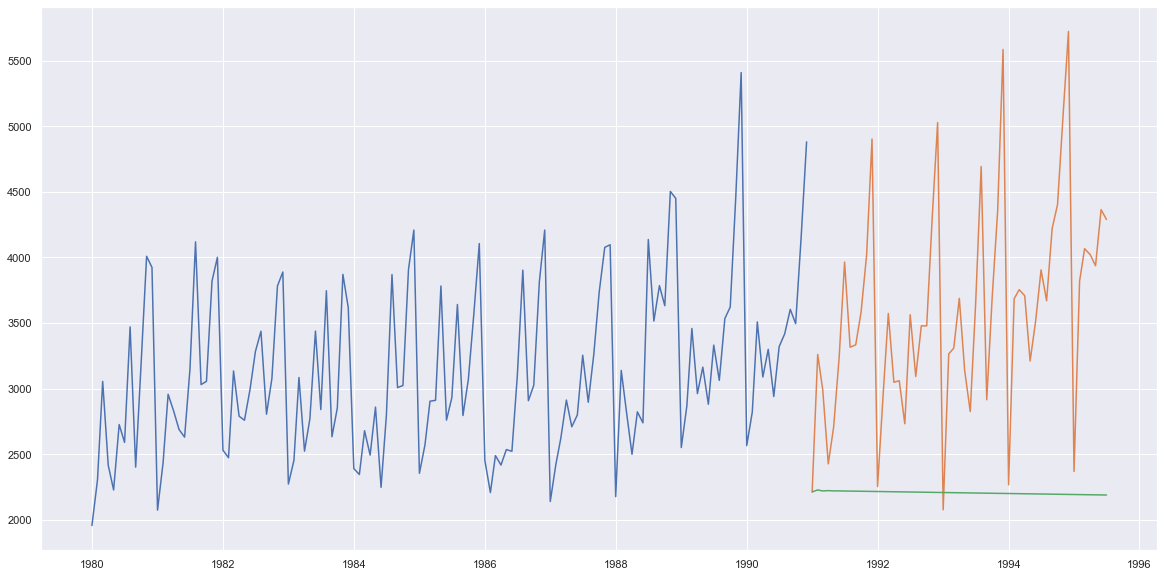

In [208]:
ARIMA_predict_diff=results_ARIMA.predict(start ="1991-01-01" , end ="1995-07-01" )
predict = check_prediction_diff(ARIMA_predict_diff, softdrink_test_set)

plt.plot(softdrink_train_set)
plt.plot(softdrink_test_set)
plt.plot(predict)
plt.show()


In [209]:
rms = sqrt(mean_squared_error(softdrink_test_set,predict )) 
softdrink_rmse['Arima(1,1,0)'] = rms
print(rms)

1609.7987672501238


### Shoe data Work

C:\Users\rishabhsaxena01\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\stattools.py:665: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


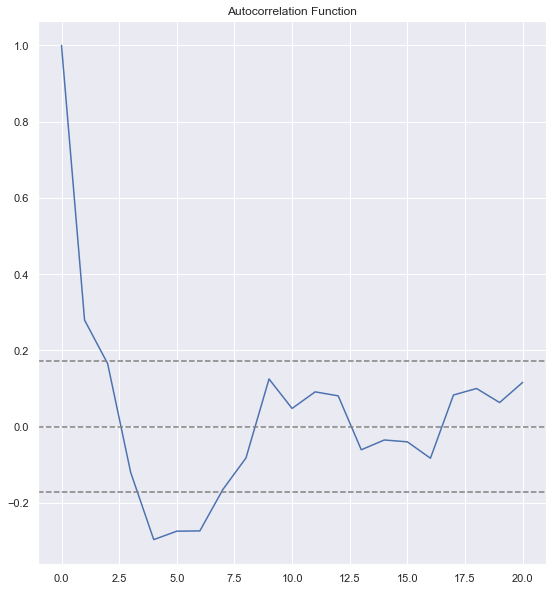

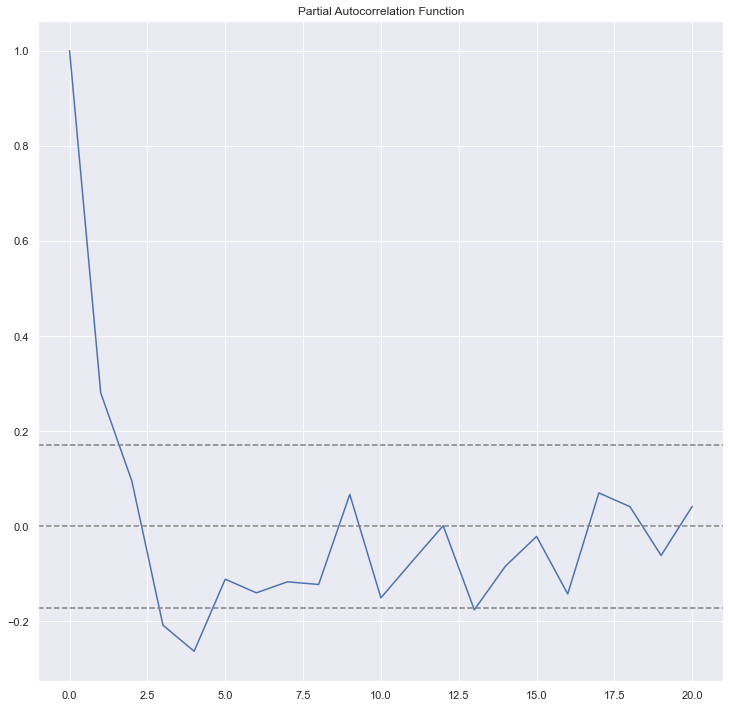

In [210]:
lag_acf = acf(shoe_train_log_decompose, nlags=20)
lag_pacf = pacf(shoe_train_log_decompose, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(shoe_train_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(shoe_train_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(shoe_train_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(shoe_train_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

C:\Users\rishabhsaxena01\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\rishabhsaxena01\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

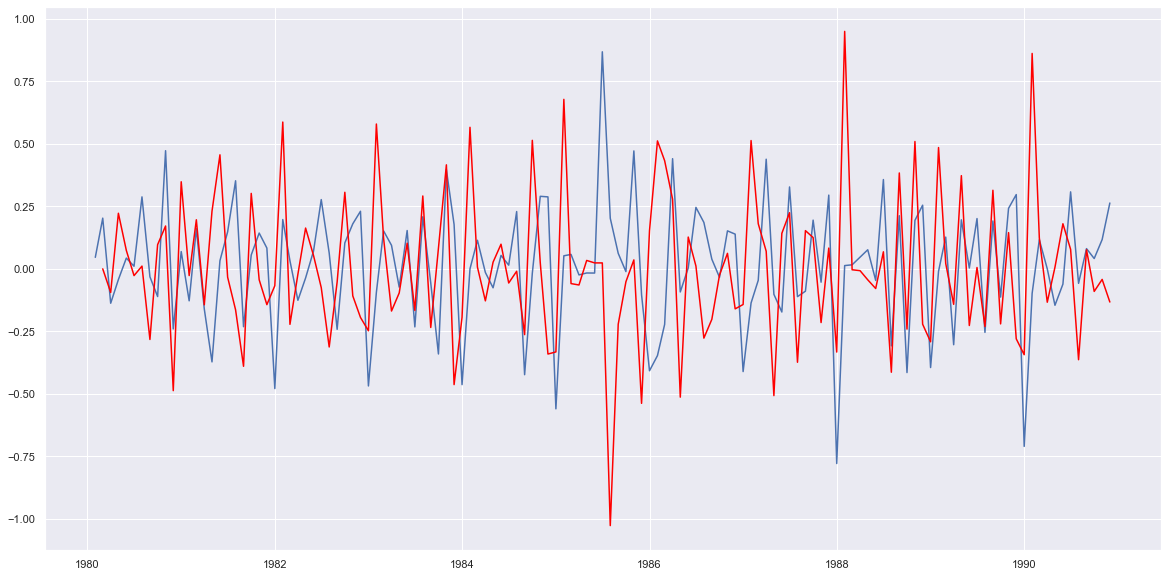

In [211]:
shoe_train_log_diff.dropna(inplace=True)
model = ARIMA(shoe_train_log_diff, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  

plt.plot(shoe_train_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

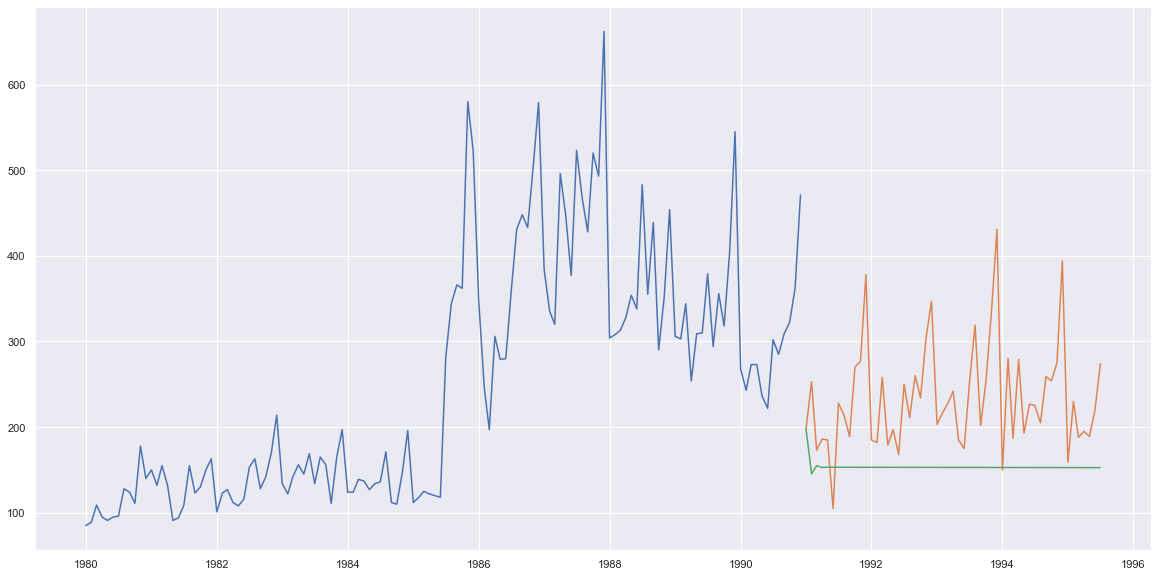

In [212]:
ARIMA_predict_diff=results_ARIMA.predict(start ="1991-01-01" , end ="1995-07-01" )
predict = check_prediction_diff(ARIMA_predict_diff, shoe_test_set)

plt.plot(shoe_train_set)
plt.plot(shoe_test_set)
plt.plot(predict)
plt.show()

In [213]:
rms = sqrt(mean_squared_error(shoe_test_set,predict )) 
shoe_rmse['Arima(1,1,1)'] = rms
print(rms)

101.69614539633481


#### Entire Table of all the models 

#### For SoftDrink Dataset`

In [214]:
softdrink_rmse

{'Naive Model': 1519.2592333705984,
 'Moving Average': 807.4612200088507,
 'SES': 1203.5659559337632,
 'Holt_Linear': 844.8400570056797,
 ' Auto Arima': 1673.1354850546547,
 'Arima(1,1,0)': 1609.7987672501238}

In [217]:
shoe_rmse

{'Naive Model': 245.1213057762514,
 'Moving Average': 94.63343153260567,
 'SES': 195.6633274569922,
 'Holt_Linear': 120.26076824710431,
 'Arima(1,1,1)': 101.69614539633481,
 'Auto Arima': 102.08447967725142}

#### The best model in my case is Moving Average So, for finalizing, I am going with the Moving average.


#### Shoe

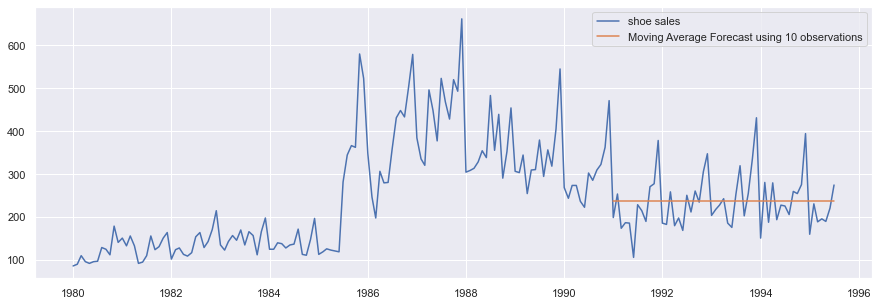

In [194]:
shoe_y_hat['moving_avg_forecast'] = shoe_data.Shoe_Sales.rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(shoe_data.Shoe_Sales, label = "shoe sales")
plt.plot(shoe_y_hat['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 

#### in moving average value is constant for all the month so prediction value for 12 month is 

In [195]:
shoe_y_hat['moving_avg_forecast'][0]

237.8

#### SoftDrink 

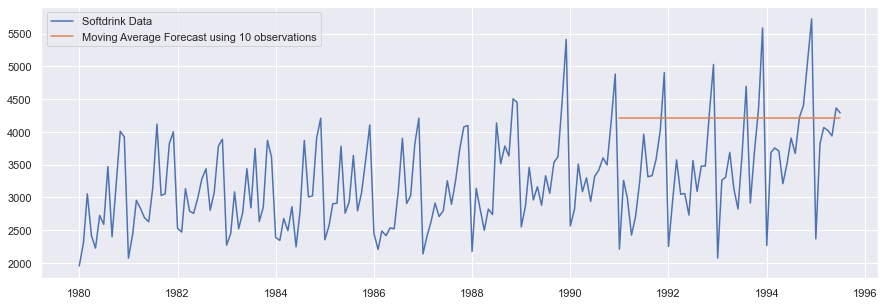

In [197]:
softdrink_y_hat['moving_avg_forecast'] = softdrink_data.SoftDrinkProduction.rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(softdrink_data.SoftDrinkProduction, label = "Softdrink Data")
plt.plot(softdrink_y_hat['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 

#### For next 12 month 

In [198]:
softdrink_y_hat['moving_avg_forecast'][0]

4208.2